In [40]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
print(os.listdir("ml-latest-small"))

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']


In [8]:
movie = pd.read_csv("ml-latest-small/movies.csv")
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [39]:
movie.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [38]:
movie['year'] = movie['title'].str.extract('.*\((.*)\).*', expand=True)
movie.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [11]:
#movie_genres = movie['genres'].str.split('|', expand=True)
#movie_genres.head()
unique_genres = pd.unique(movie[['genres']].values.ravel('K'))
print('#Unique genres combination: {}'.format(unique_genres.shape[0]))

#Unique genres: 951


In [59]:
split_genre = [unique_genres.split('|') for unique_genres in unique_genres]
genres_set = sorted(set([item for sublist in split_genre for item in sublist]))
print(genres_set)
print('#Unique genres: {}'.format(len(genres_set)))

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
#Unique genres: 20


In [74]:
def match_genre(row, cur_genre):
    movie_genres = row['genres'].split('|')
    return int(cur_genre in movie_genres)

# create additional 20 features for content-based analysis
for genre in genres_set:
    movie[genre] = movie.apply (lambda row: match_genre(row, genre),axis=1)

In [75]:
# del movie['genres']
movie.head(10)

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
tags = pd.read_csv("ml-latest-small/tags.csv")
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [14]:
tags = tags.loc[:,["userId","movieId","tag"]]
tags.head(10)

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
5,2,89774,Tom Hardy
6,2,106782,drugs
7,2,106782,Leonardo DiCaprio
8,2,106782,Martin Scorsese
9,7,48516,way too long


In [ ]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10].plot(kind='bar', figsize=(10,5))

In [15]:
movies_tags = movie.merge(tags, on='movieId', how='inner')
movies_tags.head()

,movieId,title,genres,year,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,1995,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,1995,62,magic board game


In [17]:
# import rating data and look at columsn
rating = pd.read_csv("ml-latest-small/ratings.csv")
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [18]:
# what we need is that user id, movie id and rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [19]:
#how the ratings are distributed
rating['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc0d0b8>]],
      dtype=object)

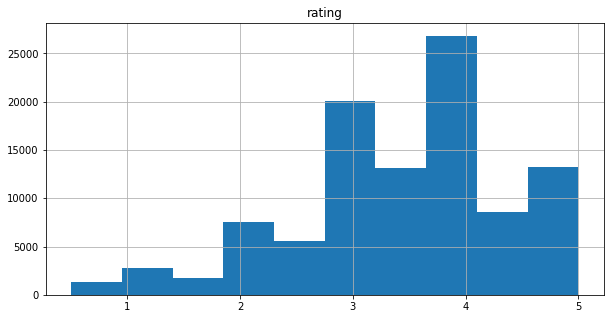

In [20]:
rating.hist(column='rating', figsize=(10,5))

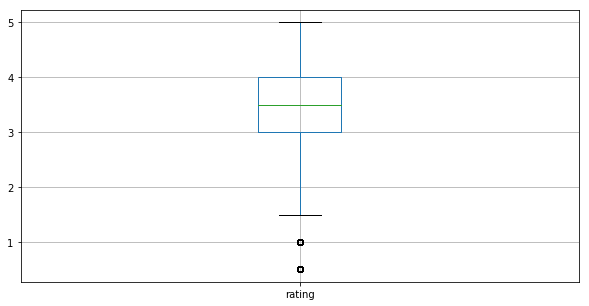

In [21]:
rating.boxplot(column='rating', figsize=(10,5))

In [22]:
#estimate average rating for each movie to replace missed values
avg_ratings= rating.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [23]:
movies_tag_avgrating = movies_tags.merge(avg_ratings, on='movieId', how='inner')
movies_tag_avgrating.tail()

,movieId,title,genres,year,userId,tag,rating
3657,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,2018,62,star wars,3.9
3658,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,2010,184,anime,3.5
3659,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,2010,184,comedy,3.5
3660,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,2010,184,gintama,3.5
3661,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,2010,184,remaster,3.5


In [24]:
movies_tag_avgrating.head()

,movieId,title,genres,year,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,336,pixar,3.920930
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,474,pixar,3.920930
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,567,fun,3.920930
3,2,Jumanji (1995),Adventure|Children|Fantasy,1995,62,fantasy,3.431818
4,2,Jumanji (1995),Adventure|Children|Fantasy,1995,62,magic board game,3.431818


In [29]:
# then merge movie and rating data
data = pd.merge(movie,rating)

In [30]:
# now lets look at our data 
data.head(10)

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,21,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,27,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,31,5.0


In [31]:
data.shape

(100836, 6)

In [32]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
# pivot_table = data.pivot_table(index = ["title"],columns = ["userId"],values = "rating")
# pivot_table.head(10)
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [33]:
movie_watched = pivot_table["Bad Boys (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head(10)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Fearless (1993)                                 1.0
Mindhunters (2004)                              1.0
Holy Man (1998)                                 1.0
The Great Raid (2005)                           1.0
Mr. 3000 (2004)                                 1.0
The Gift (2015)                                 1.0
Blue Jasmine (2013)                             1.0
Home (2015)                                     1.0
Spy Kids 2: The Island of Lost Dreams (2002)    1.0
Mississippi Burning (1988)                      1.0
dtype: float64

In [34]:
pivot_table.isnull().sum().sum()

5827758

In [35]:
print('pivot_table shape: {}, size: {}'.format(pivot_table.shape, pivot_table.size))

pivot_table shape: (610, 9719), size: 5928590


In [36]:
miss_values = pivot_table.isnull().sum().sum()/pivot_table.size
print('% of missed values: {}'.format(miss_values))

% of missed values: 0.9829922460483859
